
<center><h1><strong>Final Project - Ex2</strong></h1></center>


* __authors__ = [@diegofrencho](https://ec.linkedin.com/in/diegonoguerav) - [@g30v4](https://github.com/g30v4)
* __date__ = "03/07/2021"
* __version__ = "1.0.0"
* __license__ = "GPL"
* __module__ = "Aprendizaje Automático Aplicado" 

---
## Objetivo :
* Aplicar el uso correcto de la librería Theano, para la creación y ejecución del modelos conexionistas

## **Ejercicio #2**

Crear un conjunto de datos aleatorios y utilizar Theano para obtener los parámetros w_0 y w_1 del siguiente modelo:

y = log(1 + w_0|x| + w_1x)

utilizando los datos generados anteriormente

### Objetivos Específicos
* Obtener los parámetros w_0 y w_1

### Pasos a Realizar
* 1) Generar el conjunto de datos
* 2) Elaborar el modelo matemático
* 3) Obtener los parámetros w_0 y w_1
* 4) Graficar el conjunto datos y la función de esfuerzo 
* 5) Conclusiones

## 0) Requisitos Previos

In [ ]:
# Instalación de las librerías o dependencias necesarias
# !pip install numpy
# !pip install Theano
# !pip install matplotlib

In [22]:
# Importar librerías
import theano # Neural Network
import theano.tensor as T
import math # funciones matemáticas de python
import numpy as np
import matplotlib.pyplot as plt # gráficas

import warnings
warnings.filterwarnings('ignore')

## 1) Generar el conjunto de datos

In [42]:
# Creación del conjunto de datos
trX = np.linspace(-1, 1, 101)
trY = np.linspace(-1, 1, 101)

## 2) Elaborar el modelo matemático

In [43]:
# Creacion de variables Theano para la función o ecuación
X = T.scalar()
Y = T.scalar()

In [44]:
# Definición de la función o ecuación
def model(X, w_0, w_1):
    return X * w_0 + w_1

w_0 = theano.shared(np.asarray(0., dtype = theano.config.floatX)) # peso 1
w_1 = theano.shared(np.asarray(0., dtype = theano.config.floatX)) # peso 2
y = model(X, w_0, w_1) # seteando la función

In [45]:
# Seteando variables de interés
cost     = T.mean(T.sqr(y - Y)) # determinar el esfuerzo realizado
gradient_w_0 = T.grad(cost = cost, wrt = w_0)
gradient_w_1 = T.grad(cost = cost, wrt = w_1)
updates  = [[w_0, w_0 - gradient_w_0 * 0.01], [w_1, w_1 - gradient_w_1 * 0.01]]

In [46]:
# Creacion del modelo de entrenamiento
train = theano.function(inputs = [X, Y], outputs = cost, updates = updates)

## 3) Obtener los parámetros w_o y w_1

In [53]:
# Prueba del modelo
np.random.seed(seed=243) # Setenado semilla para obtener mismo resultados
cost = [] # Acumula los esfuerzo, para su graficación
for i in range(len(trY)):
    for x,y in zip(trX,trY):
        trY[i]  = math.log(1 + 0.5 * abs(trX[i])) + trX[i] / 3 + np.random.randn() * 0.033
        cost_i=train(x,trY[i])
    cost.append(cost_i)  # Guardamos los esfuerzos en cada pasada

# Obteniendo los valores de w_o y w_1 optimos
print('El valor de w_0 es', w_0.get_value(),
            'y w_1 es', w_1.get_value(), 'con coste', cost_i)

El valor de w_0 es -0.004851860084106768 y w_1 es 0.7382508183977651 con coste 0.0009556025107939459


## 4) Gráficas del conjunto datos y coste de aprendizaje 

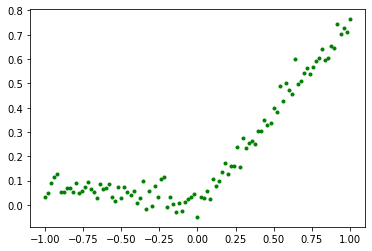

In [51]:
# Gráfica del modelo
plt.plot(trX, trY, 'g.')
plt.show()

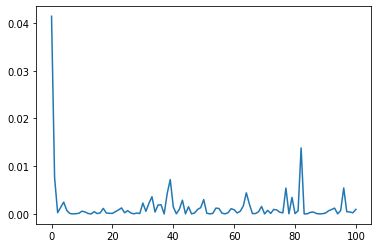

In [54]:
# Función de esfuerzo en función del número de iteraciones
plt.plot(cost)

## 5) Conclusiones

* En el inicio de la creación de las variables **trX** y **trY**, se las define como lineales, dónde posteriormente en la creaciónn de la predicción se recalcula **trY**, considerando una constante aleatoria.
* En la representación  del modelo, los datos randómicos evidencian la generación de ruido, dificultando un óptimo modelo, como se observa en la función de esfuerzo.
* La función de esfuerzo no consigue una estabilidad del modelo debido a la constante aleatoria, lo que que implica que el modelo tienda a variar el cálculo de **w_0** y **w_1**.
